## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

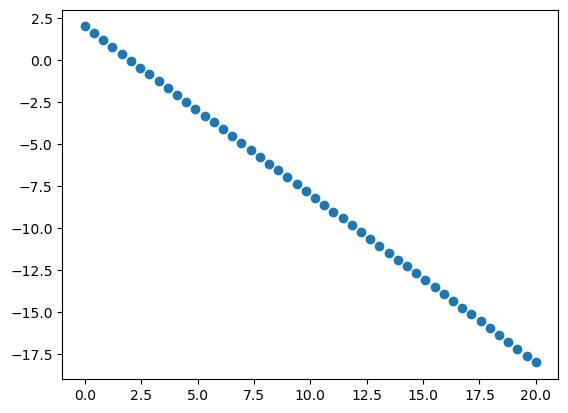

In [4]:
plt.scatter(X,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

In [7]:
e = 1e-8
def predict(X,theta):
    X = np.c_[np.ones(len(X)),X]
    predict = X@theta
    return predict

def update_ADA(learning_rate,d_theta,theta,v):
    v = v +(d_theta)**2
    theta = theta - ((learning_rate*d_theta)/(np.sqrt(v)+e))
    return theta , v 

def calc_error(h_theta,y,m):
    error = (h_theta-y)
    j = (error.T@error/(2*m))[0,0]
    return j, error

def calc_grad(X,error,m):
    d_theta = (X.T@error)/m
    grad_norm = np.linalg.norm(d_theta,2)
    return d_theta,grad_norm

def LinearRegAdagrad(X,y,learning_rate=0.001,max_itration=1000,verbose=1):
    X = np.c_[np.ones(X.shape[0]),X]
    y = y.reshape(-1,1)
    m = X.shape[0]
    theta = np.zeros((X.shape[1],1))
    v = np.zeros((X.shape[1],1))
    cost = []
    theta0_vec = []
    theta1_vec = []
    predictions = []
    for i in range(max_itration):
        h_theta = X@theta
        predictions.append(h_theta)
        
        j,error = calc_error(h_theta,y,m)
        cost.append(j)
        
        d_theta, grad_norm = calc_grad(X,error,m)
        
        
        if(grad_norm)<0.001:
            print('this is the last iteration ',i,' with the theta_0 : ',theta[0],' and theta_1 : ',theta[1])
            break
        if len(cost) > 1:
            if np.abs((cost[i-1] - cost[i]))<0.001:
                print('this is the last iteration ',i,' with the theta_0 : ',theta[0],' and theta_1 : ',theta[1])
                break
    
        theta0_vec.append(theta[0][0])
        theta1_vec.append(theta[1][0])
        theta,v = update_ADA(learning_rate,d_theta,theta,v)

        
        if i in range(0,10000,verbose):
            print('\n************************** itration ',i,'*************************\n')
            print('h(x)\n',h_theta.reshape(-1))
            print('Error Vec:\n',error.reshape(-1))
            print('\nCost = ',j.reshape(-1))
            print('Norm Gradient',grad_norm)
            print('thetas : ',theta.reshape(-1))
            # plt.figure()
            # plt.scatter(X[:,1],y)
            # plt.plot(X[:,1],h_theta,color='r')
            # plt.show()

    return theta,cost, theta0_vec, theta1_vec, predictions

def plot(learning_rate):
    plt.plot(cost,'-o')
    plt.xlim(-5,len(cost)+5)
    plt.xlabel('epochs')
    plt.ylabel('Cost')
    plt.grid()

    plt.figure()
    plt.plot(theta0_vec,cost[:len(theta0_vec)],'-o')
    plt.title(f'Learning Rate = {learning_rate}')
    plt.xlabel('Theta0')
    plt.ylabel('Cost')
    plt.grid()

    plt.figure()
    plt.plot(theta1_vec,cost[:len(theta1_vec)],'-o')
    plt.title(f'Learning Rate = {learning_rate}')
    plt.xlabel('Theta1')
    plt.ylabel('Cost')
    plt.grid()

    plt.figure()
    plt.scatter(X,y);
    for i in predictions:
        plt.plot(X,i,color='r');
    plt.title('All the Regressions Line')
    plt.grid()
    
    plt.figure()
    plt.scatter(X,y);
    plt.plot(X,y_predict,color='r');
    plt.title('Best Regression Line')
    plt.grid()


##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.05 -0.05]

************************** itration  100 *************************

h(x

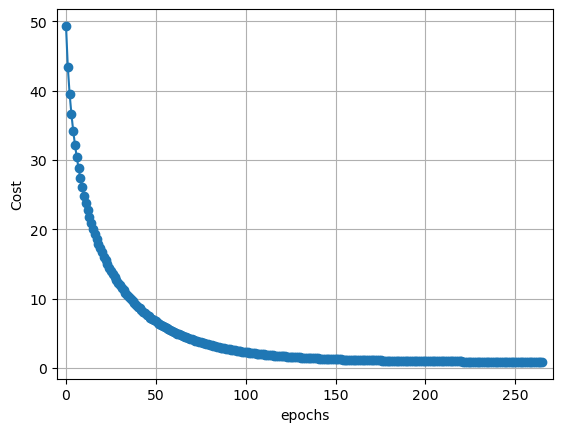

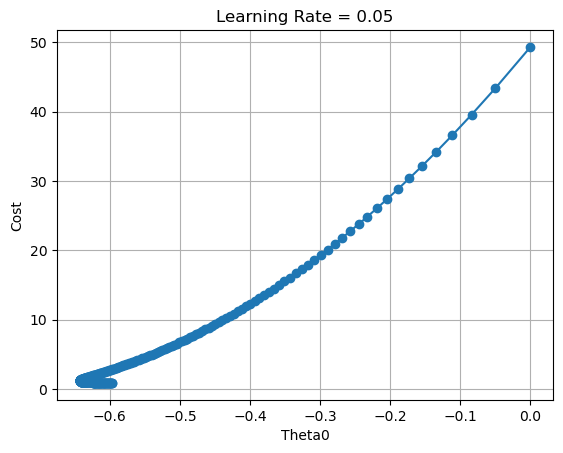

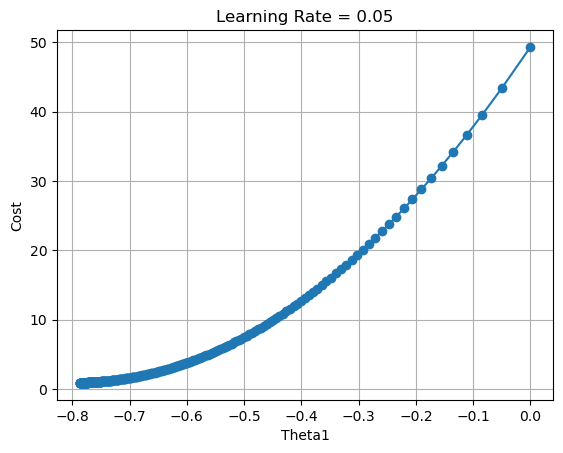

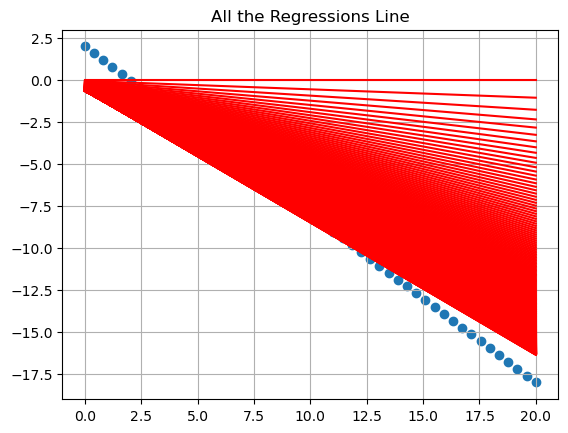

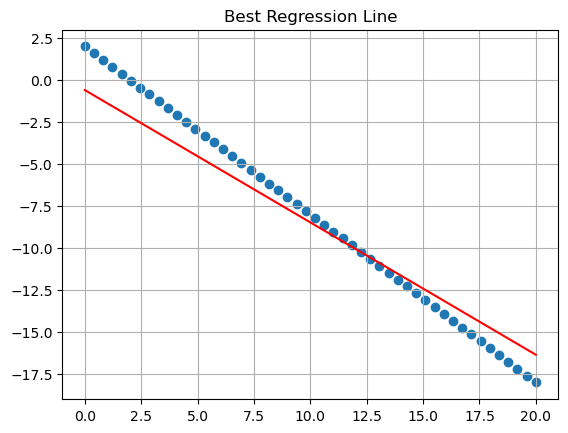

In [27]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearRegAdagrad(X,y,learning_rate=0.05,max_itration=500,verbose=100)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))

plot(learning_rate=0.05)

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.005 -0.005]

************************** itration  1000 *************************



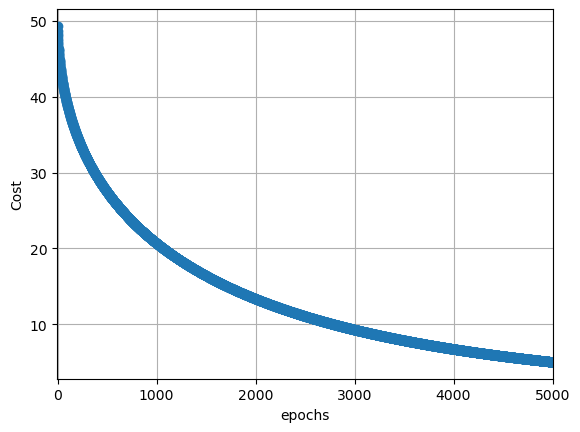

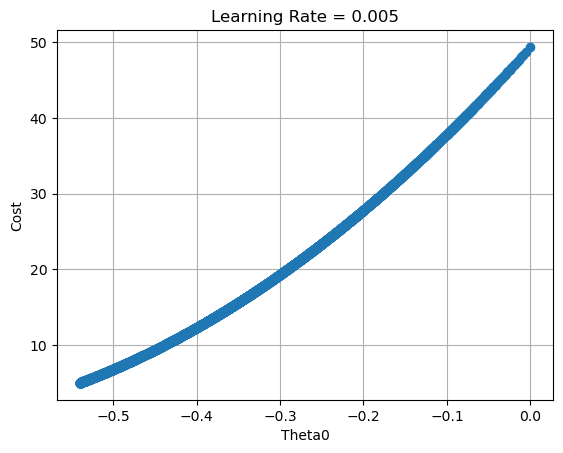

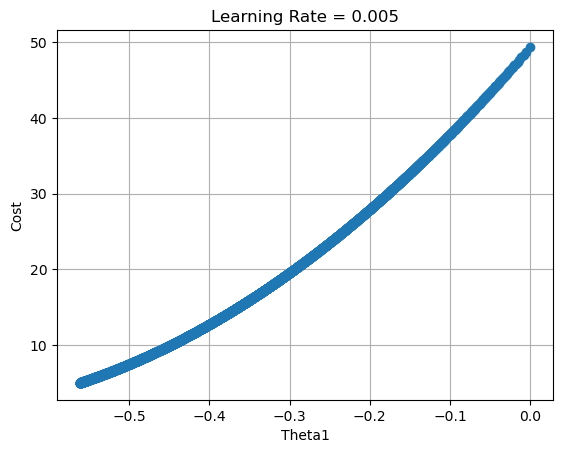

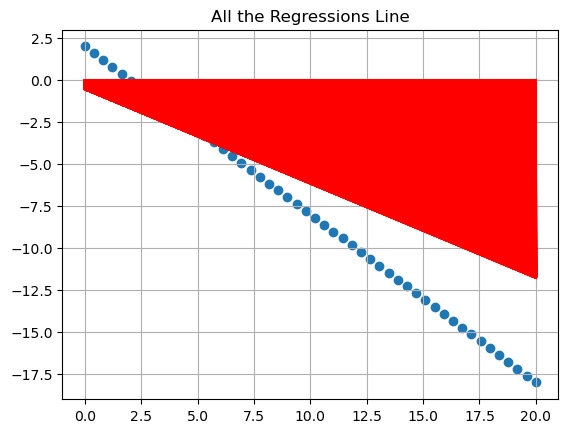

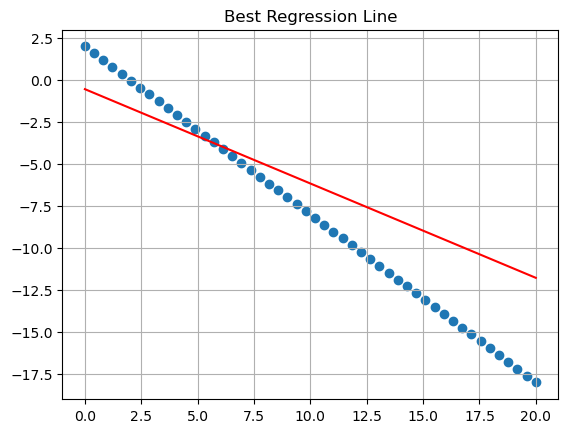

In [28]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearRegAdagrad(X,y,learning_rate=0.005,max_itration=5000,verbose=1000)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))

plot(learning_rate=0.005)

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.0005 -0.0005]

************************** itration  1000 *************************

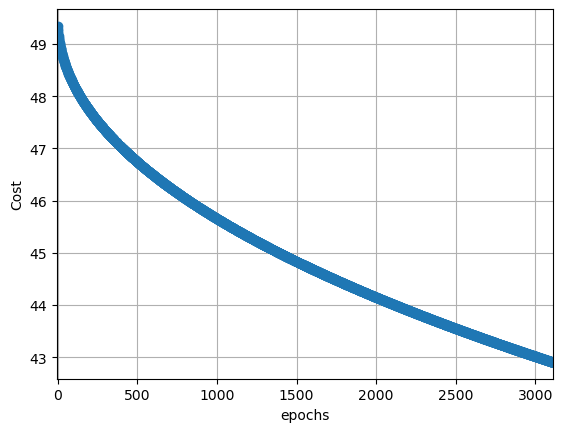

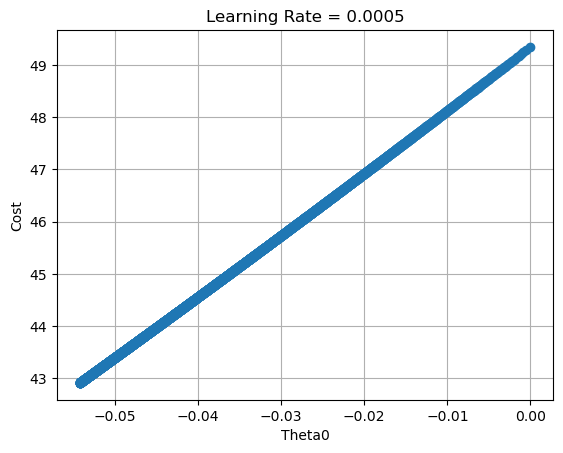

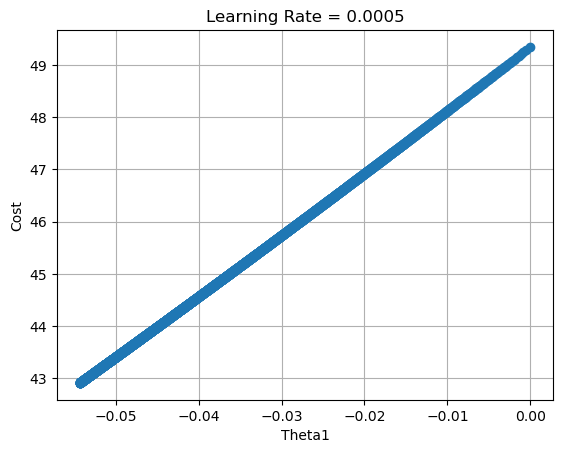

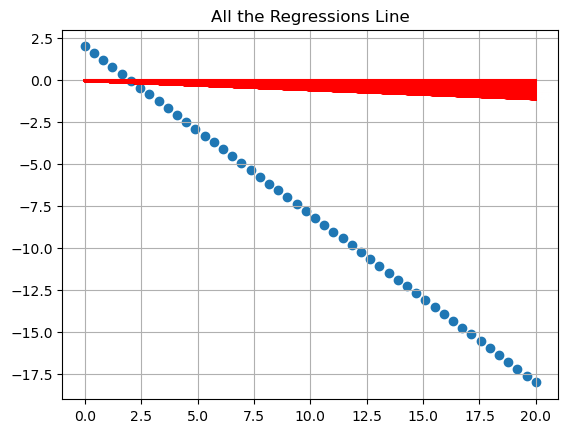

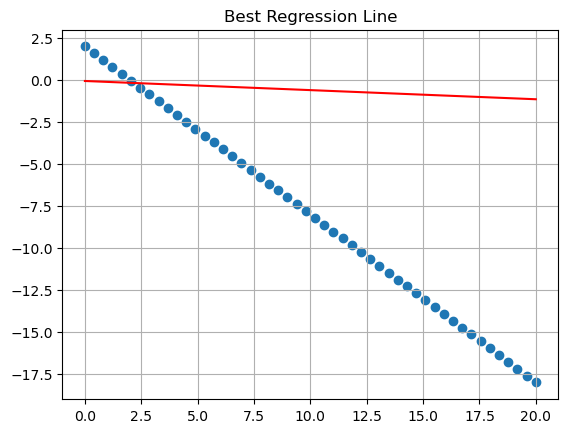

In [29]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearRegAdagrad(X,y,learning_rate=0.0005,max_itration=5000,verbose=1000)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))
print('\n')

plot(learning_rate=0.0005)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [30]:
e = 1e-8
def predict(X,theta):
    X = np.c_[np.ones(len(X)),X]
    predict = X@theta
    return predict

def update_RMS(learning_rate,d_theta,theta,v,beta):
    v = beta*v + (1-beta)*(d_theta)**2
    theta = theta - ((learning_rate*d_theta)/(np.sqrt(v)+e))
    return theta , v 

def calc_error(h_theta,y,m):
    error = (h_theta-y)
    j = (error.T@error/(2*m))[0,0]
    return j, error

def calc_grad(X,error,m):
    d_theta = (X.T@error)/m
    grad_norm = np.linalg.norm(d_theta,2)
    return d_theta,grad_norm

def LinearRegRMS(X,y,learning_rate=0.001,max_itration=1000,verbose=1,beta=0.9):
    X = np.c_[np.ones(X.shape[0]),X]
    y = y.reshape(-1,1)
    m = X.shape[0]
    theta = np.zeros((X.shape[1],1))
    v = np.zeros((X.shape[1],1))
    cost = []
    theta0_vec = []
    theta1_vec = []
    predictions = []
    for i in range(max_itration):
        h_theta = X@theta
        predictions.append(h_theta)
        
        j,error = calc_error(h_theta,y,m)
        cost.append(j)
        
        d_theta, grad_norm = calc_grad(X,error,m)
        
        
        if(grad_norm)<0.001:
            print('this is the last iteration ',i,' with the theta_0 : ',theta[0],' and theta_1 : ',theta[1])
            break
        if len(cost) > 1:
            if np.abs((cost[i-1] - cost[i]))<0.001:
                print('this is the last iteration ',i,' with the theta_0 : ',theta[0],' and theta_1 : ',theta[1])
                break
    
        theta0_vec.append(theta[0][0])
        theta1_vec.append(theta[1][0])
        theta,v = update_RMS(learning_rate,d_theta,theta,v,beta)

        
        if i in range(0,10000,verbose):
            print('\n************************** itration ',i,'*************************\n')
            print('h(x)\n',h_theta.reshape(-1))
            print('Error Vec:\n',error.reshape(-1))
            print('\nCost = ',j.reshape(-1))
            print('Norm Gradient',grad_norm)
            print('thetas : ',theta.reshape(-1))
            # plt.figure()
            # plt.scatter(X[:,1],y)
            # plt.plot(X[:,1],h_theta,color='r')
            # plt.show()

    return theta,cost, theta0_vec, theta1_vec, predictions

# def plot():
#     plt.plot(cost,'-o')
#     plt.xlim(-5,len(cost)+5)
#     plt.xlabel('epochs')
#     plt.ylabel('Cost')
#     plt.grid()

#     plt.figure()
#     plt.plot(theta0_vec,cost[:len(theta0_vec)],'-o')
#     plt.title('Learning Rate = 0.0005')
#     plt.xlabel('Theta0')
#     plt.ylabel('Cost')
#     plt.grid()

#     plt.figure()
#     plt.plot(theta1_vec,cost[:len(theta1_vec)],'-o')
#     plt.title('Learning Rate = 0.0005')
#     plt.xlabel('Theta1')
#     plt.ylabel('Cost')
#     plt.grid()

#     plt.figure()
#     plt.scatter(X,y);
#     for i in predictions:
#         plt.plot(X,i,color='r');
#     plt.title('Best Regression Line')
#     plt.grid()


##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.15811388 -0.15811388]

************************** itration  50 *******************

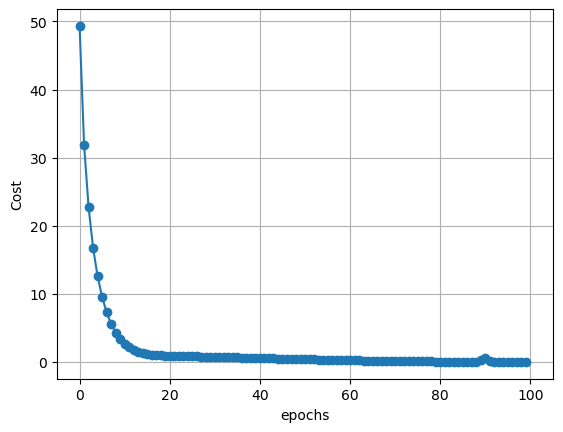

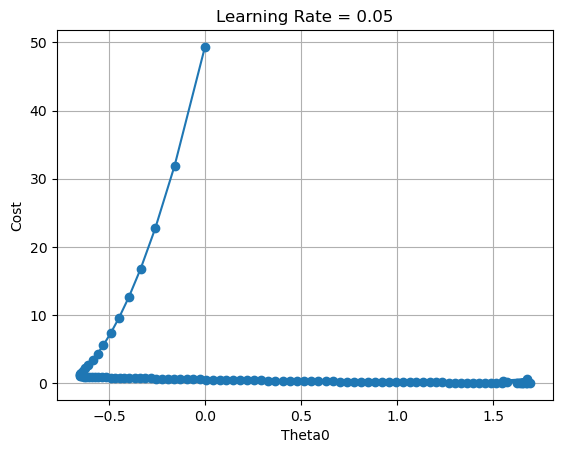

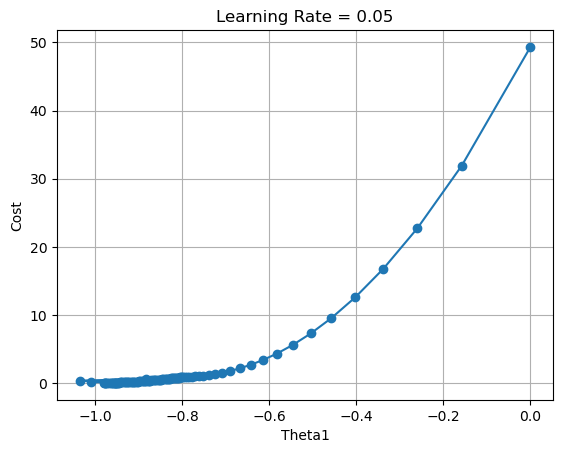

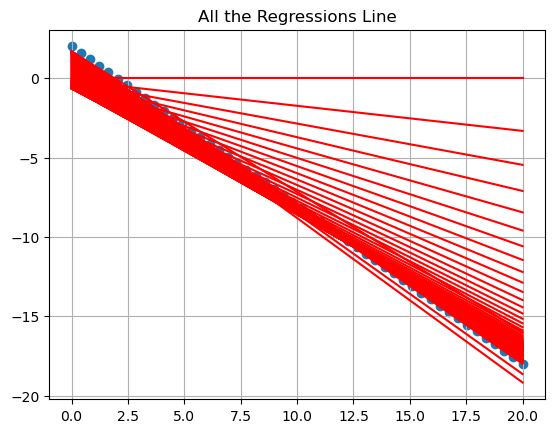

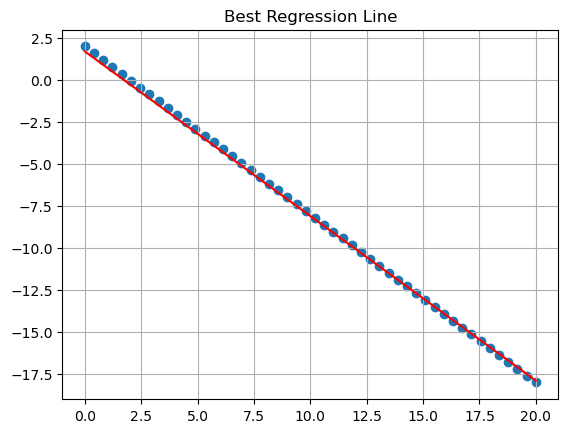

In [32]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearRegRMS(X,y,learning_rate=0.05,max_itration=500,verbose=50,beta=0.9)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))
print('\n')

plot(learning_rate=0.05)

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.01581139 -0.01581139]
this is the last iteration  540  with the theta_0 :  [1.1743

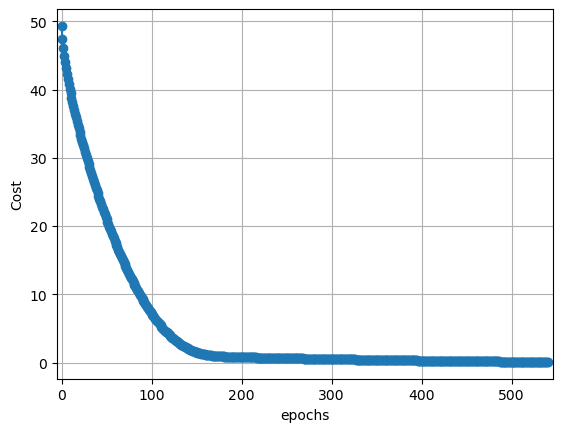

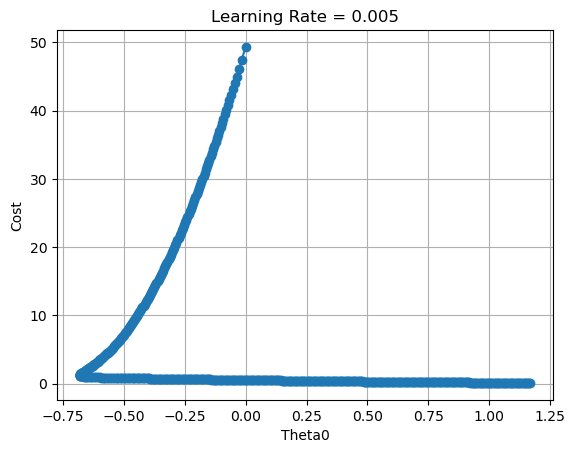

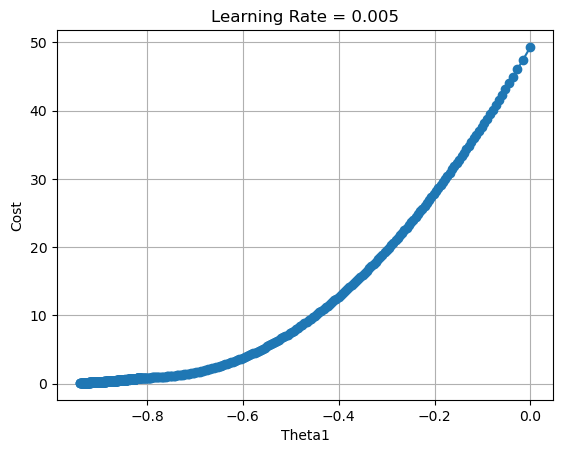

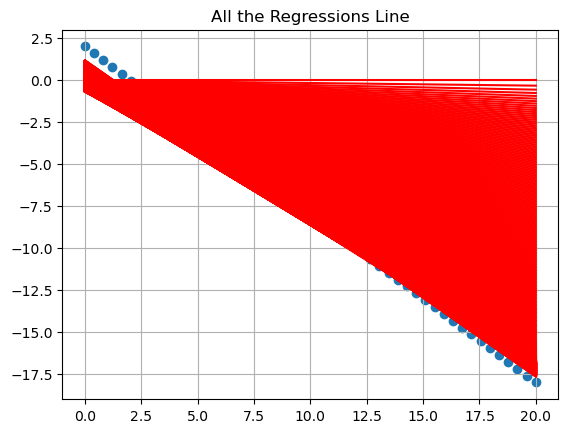

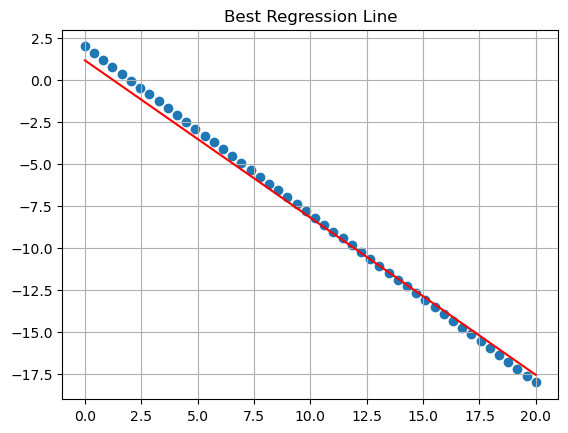

In [36]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearRegRMS(X,y,learning_rate=0.005,max_itration=5000,verbose=1000,beta=0.9)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))
print('\n')

plot(learning_rate=0.005)

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.00158114 -0.00158114]

************************** itration  1000 *****************

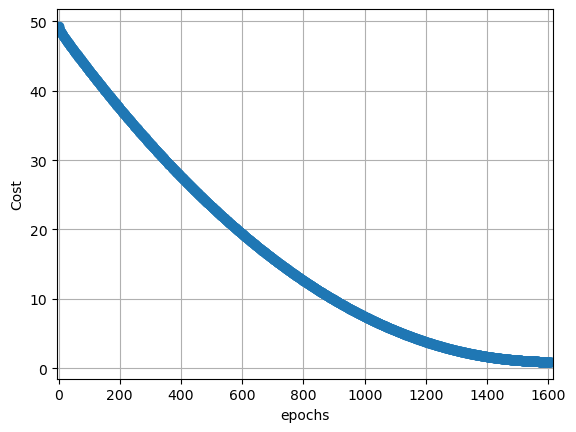

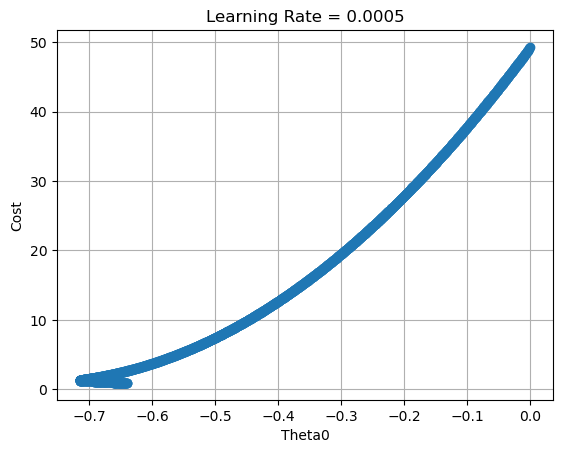

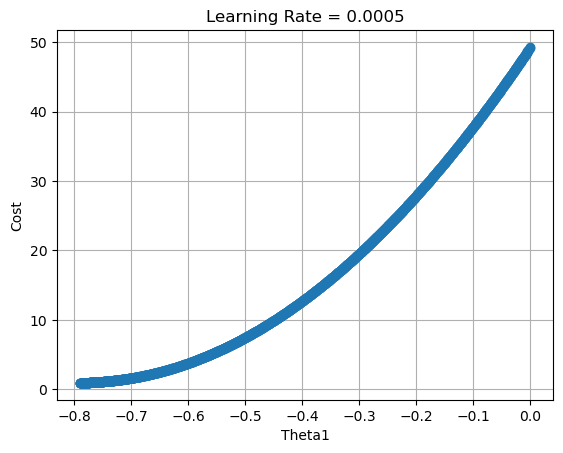

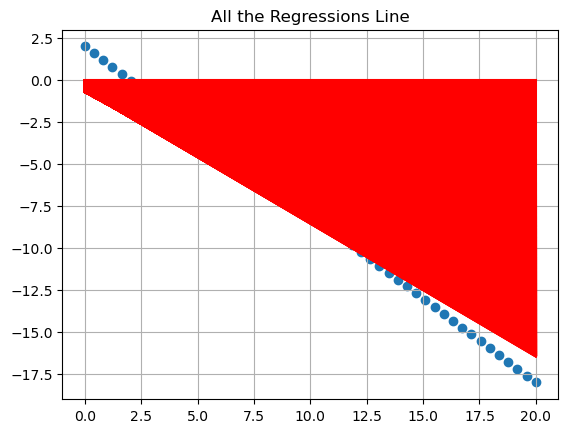

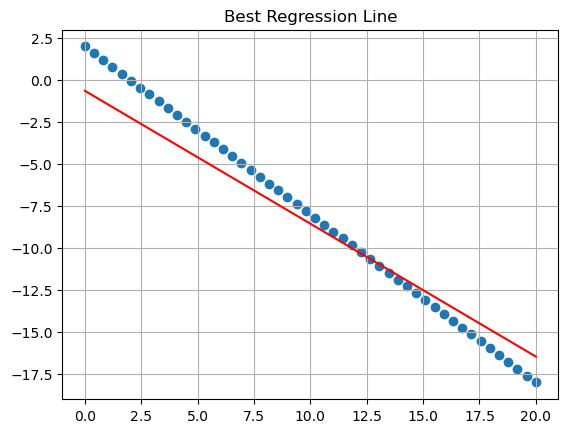

In [37]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearRegRMS(X,y,learning_rate=0.0005,max_itration=5000,verbose=1000,beta=0.9)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))
print('\n')

plot(learning_rate=0.0005)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [5]:
e = 1e-8
def predict(X,theta):
    X = np.c_[np.ones(len(X)),X]
    predict = X@theta
    return predict

def update_Adam(i,learning_rate,d_theta,theta,v,mo,beta_1,beta_2):
    
    mo = beta_1*mo + (1-beta_1)*(d_theta)
    v = beta_2*v + (1-beta_2)*(d_theta)**2
    
    mo_hat = mo / (1-beta_1**(i+1))
    v_hat = v / (1-beta_2**(i+1))
    
    theta = theta - (learning_rate/(np.sqrt(v_hat)+e))*mo_hat
    return theta , v , mo

def calc_error(h_theta,y,m):
    error = (h_theta-y)
    j = (error.T@error/(2*m))[0,0]
    return j, error

def calc_grad(X,error,m):
    d_theta = (X.T@error)/m
    grad_norm = np.linalg.norm(d_theta,2)
    return d_theta,grad_norm

def LinearRegAdam(X,y,learning_rate=0.001,max_itration=1000,verbose=1,beta_1=0.9,beta_2=0.999):
    X = np.c_[np.ones(X.shape[0]),X]
    y = y.reshape(-1,1)
    m = X.shape[0]
    theta = np.zeros((X.shape[1],1))
    v = np.zeros((X.shape[1],1))
    mo = np.zeros((X.shape[1],1))
    cost = []
    theta0_vec = []
    theta1_vec = []
    predictions = []
    for i in range(max_itration):
        h_theta = X@theta
        predictions.append(h_theta)
        
        j,error = calc_error(h_theta,y,m)
        cost.append(j)
        
        d_theta, grad_norm = calc_grad(X,error,m)
        
        
        if(grad_norm)<0.001:
            print('this is the last iteration ',i,' with the theta_0 : ',theta[0],' and theta_1 : ',theta[1])
            break
        if len(cost) > 1:
            if np.abs((cost[i-1] - cost[i]))<0.001:
                print('this is the last iteration ',i,' with the theta_0 : ',theta[0],' and theta_1 : ',theta[1])
                break
    
        theta0_vec.append(theta[0][0])
        theta1_vec.append(theta[1][0])
        theta,v,mo = update_Adam(i,learning_rate,d_theta,theta,v,mo,beta_1,beta_2)

        
        if i in range(0,10000,verbose):
            print('\n************************** itration ',i,'*************************\n')
            print('h(x)\n',h_theta.reshape(-1))
            print('Error Vec:\n',error.reshape(-1))
            print('\nCost = ',j.reshape(-1))
            print('Norm Gradient',grad_norm)
            print('thetas : ',theta.reshape(-1))
            plt.figure()
            plt.scatter(X[:,1],y)
            plt.plot(X[:,1],h_theta,color='r')
            plt.show()

    return theta,cost, theta0_vec, theta1_vec, predictions

##### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.05 -0.05]


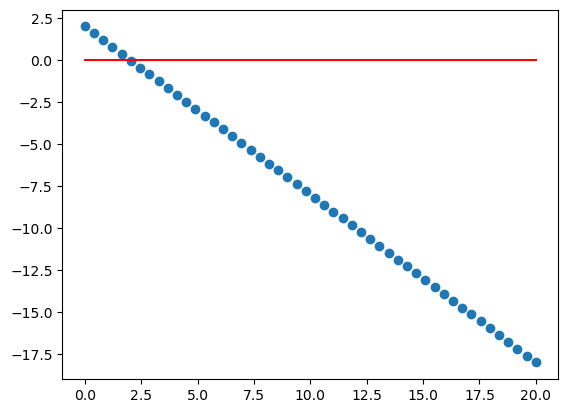

this is the last iteration  82  with the theta_0 :  [1.6807367]  and theta_1 :  [-0.96786967]

The R-square value :  0.9989675218213946




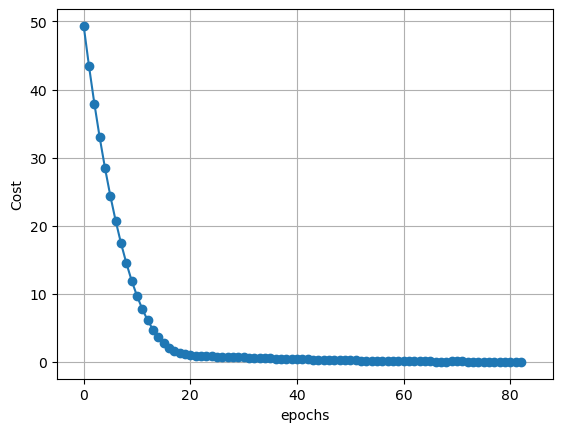

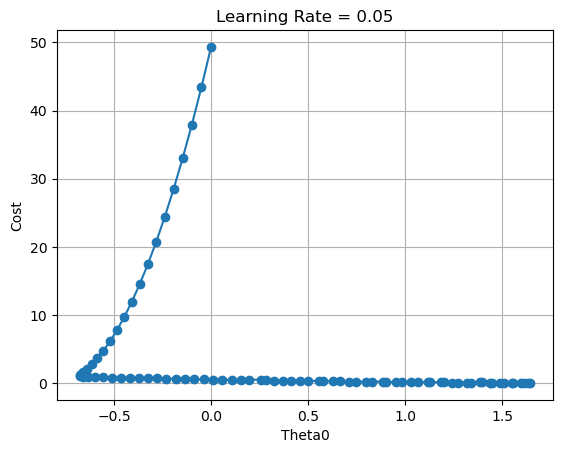

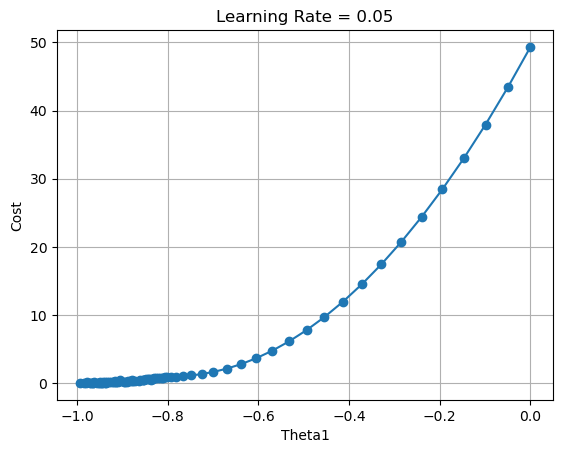

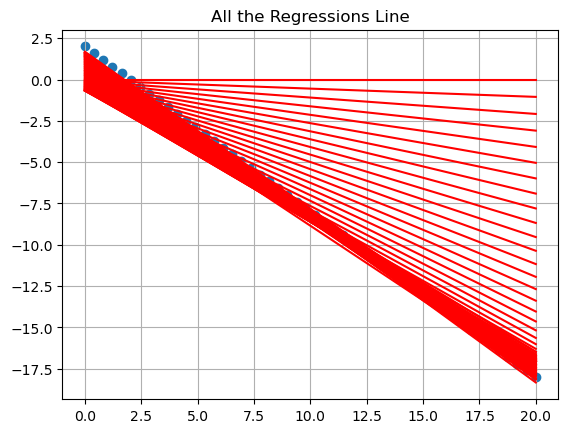

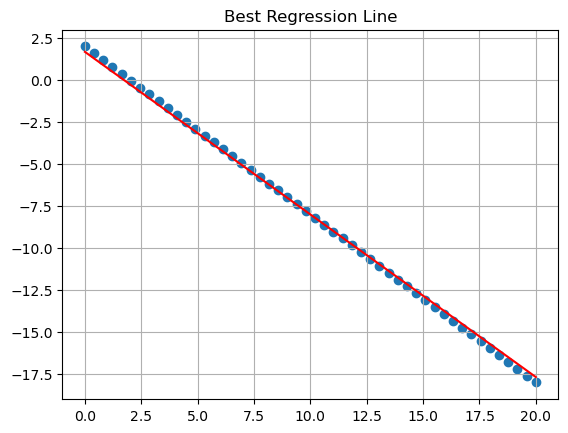

In [8]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearRegAdam(X,y,learning_rate=0.05,max_itration=500,verbose=100,beta_1=0.2,beta_2=0.7)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))
print('\n')

plot(learning_rate=0.05)

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.005 -0.005]


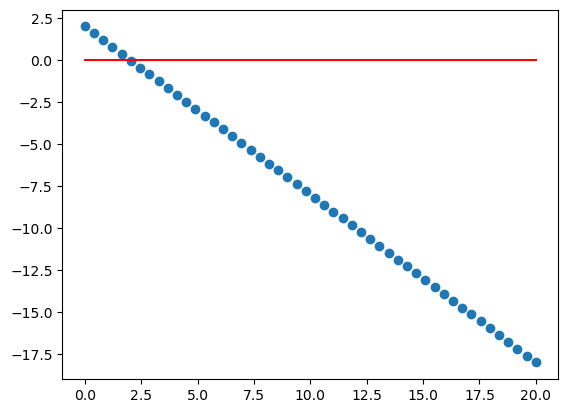


************************** itration  100 *************************

h(x)
 [ -0.48465807  -0.68335436  -0.88205065  -1.08074694  -1.27944322
  -1.47813951  -1.6768358   -1.87553208  -2.07422837  -2.27292466
  -2.47162095  -2.67031723  -2.86901352  -3.06770981  -3.26640609
  -3.46510238  -3.66379867  -3.86249495  -4.06119124  -4.25988753
  -4.45858382  -4.6572801   -4.85597639  -5.05467268  -5.25336896
  -5.45206525  -5.65076154  -5.84945783  -6.04815411  -6.2468504
  -6.44554669  -6.64424297  -6.84293926  -7.04163555  -7.24033184
  -7.43902812  -7.63772441  -7.8364207   -8.03511698  -8.23381327
  -8.43250956  -8.63120585  -8.82990213  -9.02859842  -9.22729471
  -9.42599099  -9.62468728  -9.82338357 -10.02207986 -10.22077614]
Error Vec:
 [-2.48465807 -2.2751911  -2.06572412 -1.85625714 -1.64679016 -1.43732318
 -1.2278562  -1.01838923 -0.80892225 -0.59945527 -0.38998829 -0.18052131
  0.02894566  0.23841264  0.44787962  0.6573466   0.86681358  1.07628056
  1.28574753  1.49521451  1.704681

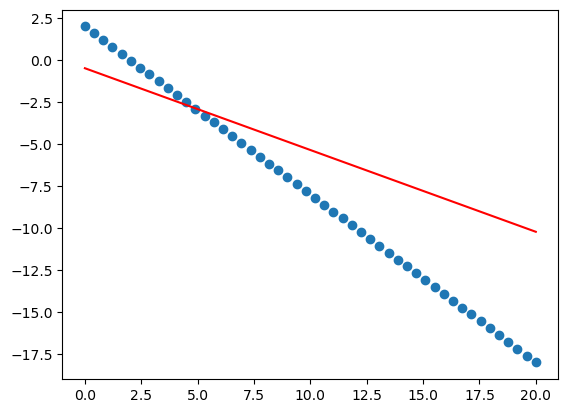


************************** itration  200 *************************

h(x)
 [ -0.47731143  -0.81037491  -1.14343839  -1.47650186  -1.80956534
  -2.14262881  -2.47569229  -2.80875576  -3.14181924  -3.47488272
  -3.80794619  -4.14100967  -4.47407314  -4.80713662  -5.14020009
  -5.47326357  -5.80632705  -6.13939052  -6.472454    -6.80551747
  -7.13858095  -7.47164442  -7.8047079   -8.13777138  -8.47083485
  -8.80389833  -9.1369618   -9.47002528  -9.80308875 -10.13615223
 -10.46921571 -10.80227918 -11.13534266 -11.46840613 -11.80146961
 -12.13453308 -12.46759656 -12.80066004 -13.13372351 -13.46678699
 -13.79985046 -14.13291394 -14.46597742 -14.79904089 -15.13210437
 -15.46516784 -15.79823132 -16.13129479 -16.46435827 -16.79742175]
Error Vec:
 [-2.47731143e+00 -2.40221164e+00 -2.32711185e+00 -2.25201207e+00
 -2.17691228e+00 -2.10181249e+00 -2.02671270e+00 -1.95161291e+00
 -1.87651312e+00 -1.80141333e+00 -1.72631354e+00 -1.65121375e+00
 -1.57611396e+00 -1.50101417e+00 -1.42591438e+00 -1.35081

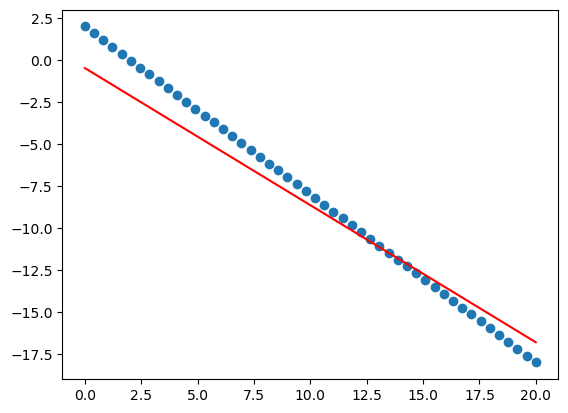


************************** itration  300 *************************

h(x)
 [  0.01931746  -0.32892755  -0.67717256  -1.02541757  -1.37366258
  -1.72190759  -2.0701526   -2.41839761  -2.76664262  -3.11488763
  -3.46313263  -3.81137764  -4.15962265  -4.50786766  -4.85611267
  -5.20435768  -5.55260269  -5.9008477   -6.24909271  -6.59733772
  -6.94558273  -7.29382774  -7.64207275  -7.99031775  -8.33856276
  -8.68680777  -9.03505278  -9.38329779  -9.7315428  -10.07978781
 -10.42803282 -10.77627783 -11.12452284 -11.47276785 -11.82101286
 -12.16925786 -12.51750287 -12.86574788 -13.21399289 -13.5622379
 -13.91048291 -14.25872792 -14.60697293 -14.95521794 -15.30346295
 -15.65170796 -15.99995297 -16.34819797 -16.69644298 -17.04468799]
Error Vec:
 [-1.98068254 -1.92076429 -1.86084603 -1.80092777 -1.74100952 -1.68109126
 -1.62117301 -1.56125475 -1.50133649 -1.44141824 -1.38149998 -1.32158173
 -1.26166347 -1.20174521 -1.14182696 -1.0819087  -1.02199045 -0.96207219
 -0.90215393 -0.84223568 -0.782317

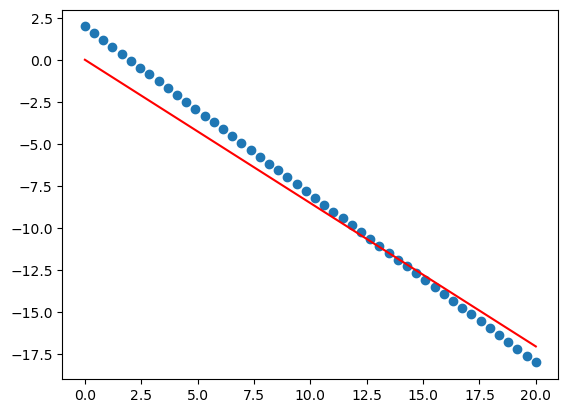


************************** itration  400 *************************

h(x)
 [  0.51492791   0.15223491  -0.21045809  -0.57315109  -0.9358441
  -1.2985371   -1.6612301   -2.0239231   -2.38661611  -2.74930911
  -3.11200211  -3.47469511  -3.83738812  -4.20008112  -4.56277412
  -4.92546712  -5.28816013  -5.65085313  -6.01354613  -6.37623913
  -6.73893214  -7.10162514  -7.46431814  -7.82701114  -8.18970415
  -8.55239715  -8.91509015  -9.27778315  -9.64047616 -10.00316916
 -10.36586216 -10.72855516 -11.09124817 -11.45394117 -11.81663417
 -12.17932717 -12.54202018 -12.90471318 -13.26740618 -13.63009918
 -13.99279219 -14.35548519 -14.71817819 -15.08087119 -15.4435642
 -15.8062572  -16.1689502  -16.5316432  -16.89433621 -17.25702921]
Error Vec:
 [-1.48507209 -1.43960182 -1.39413156 -1.3486613  -1.30319104 -1.25772077
 -1.21225051 -1.16678025 -1.12130998 -1.07583972 -1.03036946 -0.9848992
 -0.93942893 -0.89395867 -0.84848841 -0.80301814 -0.75754788 -0.71207762
 -0.66660736 -0.62113709 -0.57566683

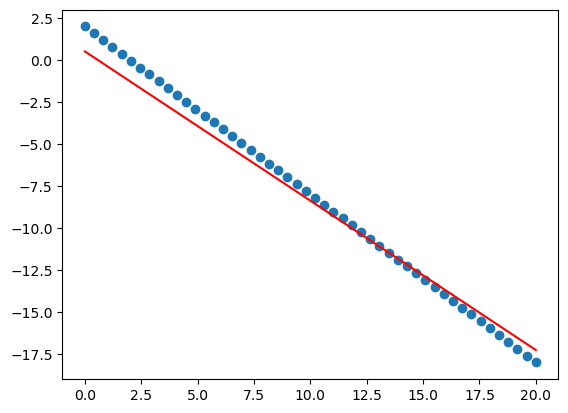


The R-square value :  0.9927027251475105




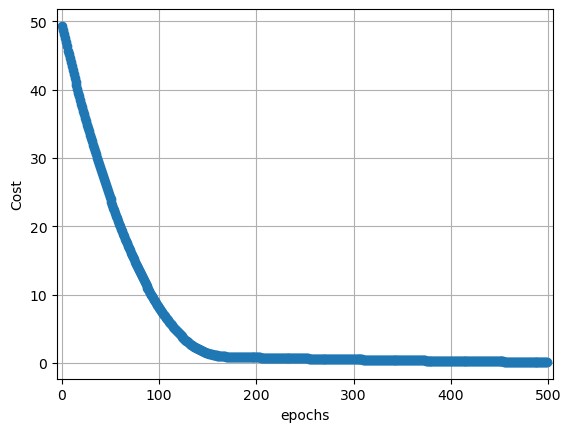

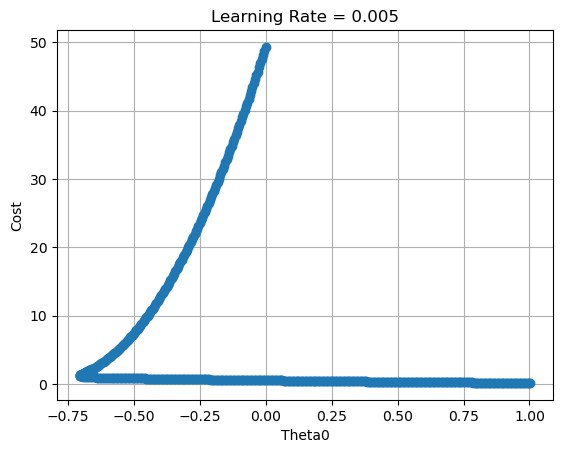

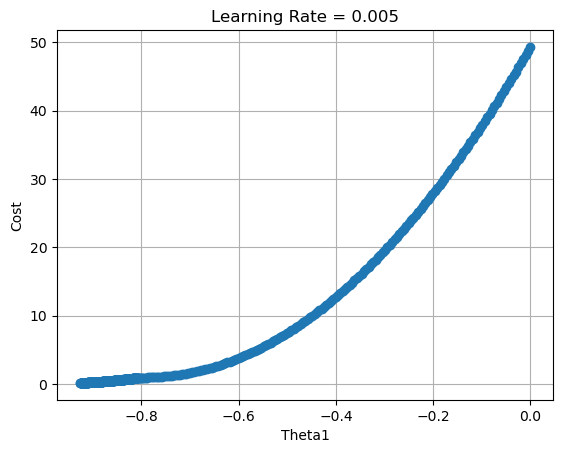

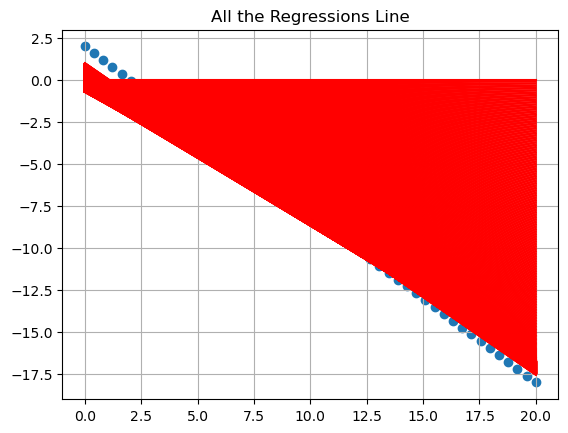

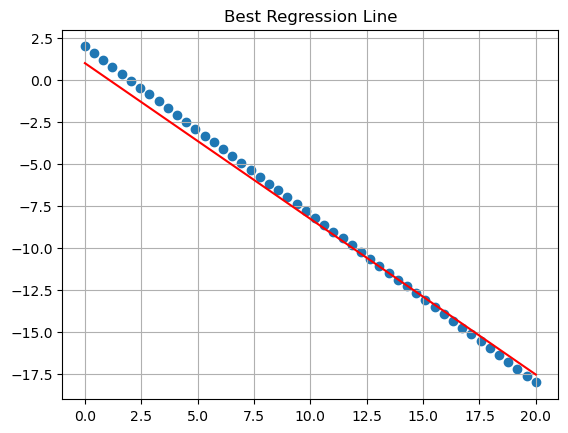

In [79]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearRegAdam(X,y,learning_rate=0.005,max_itration=500,verbose=100,beta_1=0.5,beta_2=0.8)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))
print('\n')

plot(learning_rate=0.005)

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.0005 -0.0005]


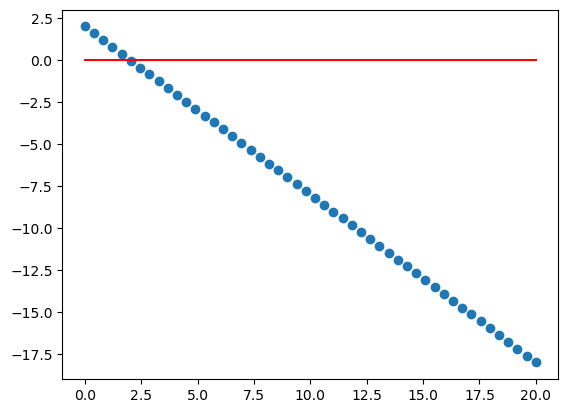


************************** itration  500 *************************

h(x)
 [-0.24999825 -0.35203849 -0.45407873 -0.55611896 -0.6581592  -0.76019944
 -0.86223968 -0.96427992 -1.06632016 -1.1683604  -1.27040064 -1.37244088
 -1.47448112 -1.57652136 -1.67856159 -1.78060183 -1.88264207 -1.98468231
 -2.08672255 -2.18876279 -2.29080303 -2.39284327 -2.49488351 -2.59692375
 -2.69896399 -2.80100422 -2.90304446 -3.0050847  -3.10712494 -3.20916518
 -3.31120542 -3.41324566 -3.5152859  -3.61732614 -3.71936638 -3.82140662
 -3.92344685 -4.02548709 -4.12752733 -4.22956757 -4.33160781 -4.43364805
 -4.53568829 -4.63772853 -4.73976877 -4.84180901 -4.94384924 -5.04588948
 -5.14792972 -5.24996996]
Error Vec:
 [-2.24999825 -1.94387522 -1.63775219 -1.33162917 -1.02550614 -0.71938312
 -0.41326009 -0.10713706  0.19898596  0.50510899  0.81123202  1.11735504
  1.42347807  1.72960109  2.03572412  2.34184715  2.64797017  2.9540932
  3.26021622  3.56633925  3.87246228  4.1785853   4.48470833  4.79083136
  5.09695438

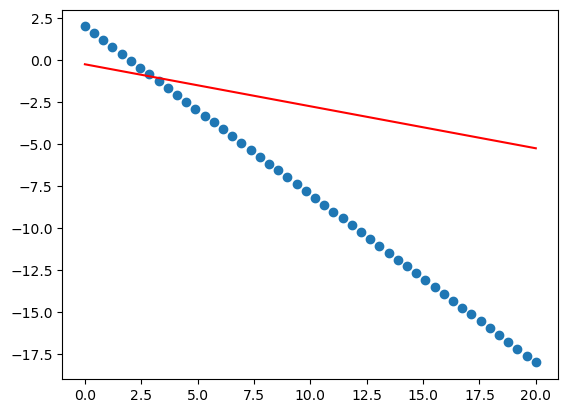


************************** itration  1000 *************************

h(x)
 [ -0.49999257  -0.70407204  -0.9081515   -1.11223097  -1.31631044
  -1.52038991  -1.72446938  -1.92854885  -2.13262831  -2.33670778
  -2.54078725  -2.74486672  -2.94894619  -3.15302565  -3.35710512
  -3.56118459  -3.76526406  -3.96934353  -4.17342299  -4.37750246
  -4.58158193  -4.7856614   -4.98974087  -5.19382034  -5.3978998
  -5.60197927  -5.80605874  -6.01013821  -6.21421768  -6.41829714
  -6.62237661  -6.82645608  -7.03053555  -7.23461502  -7.43869448
  -7.64277395  -7.84685342  -8.05093289  -8.25501236  -8.45909183
  -8.66317129  -8.86725076  -9.07133023  -9.2754097   -9.47948917
  -9.68356863  -9.8876481  -10.09172757 -10.29580704 -10.49988651]
Error Vec:
 [-2.49999257 -2.29590877 -2.09182497 -1.88774118 -1.68365738 -1.47957358
 -1.27548979 -1.07140599 -0.86732219 -0.66323839 -0.4591546  -0.2550708
 -0.050987    0.1530968   0.35718059  0.56126439  0.76534819  0.96943198
  1.17351578  1.37759958  1.581683

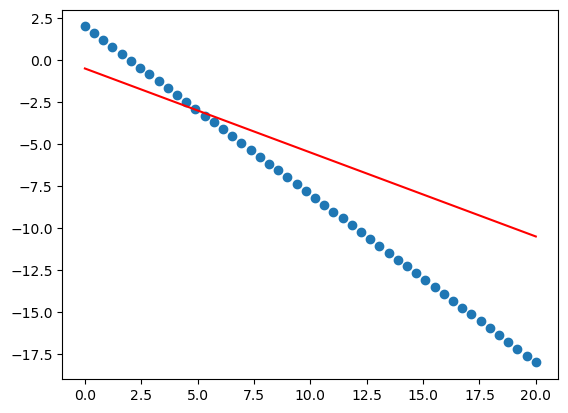


************************** itration  1500 *************************

h(x)
 [ -0.70917987  -1.01528272  -1.32138556  -1.62748841  -1.93359125
  -2.2396941   -2.54579694  -2.85189979  -3.15800263  -3.46410548
  -3.77020832  -4.07631117  -4.38241401  -4.68851686  -4.9946197
  -5.30072255  -5.60682539  -5.91292824  -6.21903108  -6.52513393
  -6.83123677  -7.13733962  -7.44344246  -7.74954531  -8.05564815
  -8.361751    -8.66785384  -8.97395669  -9.28005953  -9.58616238
  -9.89226522 -10.19836806 -10.50447091 -10.81057375 -11.1166766
 -11.42277944 -11.72888229 -12.03498513 -12.34108798 -12.64719082
 -12.95329367 -13.25939651 -13.56549936 -13.8716022  -14.17770505
 -14.48380789 -14.78991074 -15.09601358 -15.40211643 -15.70821927]
Error Vec:
 [-2.70917987 -2.60711945 -2.50505903 -2.40299861 -2.30093819 -2.19887777
 -2.09681735 -1.99475693 -1.89269651 -1.79063609 -1.68857567 -1.58651525
 -1.48445483 -1.38239441 -1.28033399 -1.17827357 -1.07621315 -0.97415273
 -0.87209231 -0.77003189 -0.667971

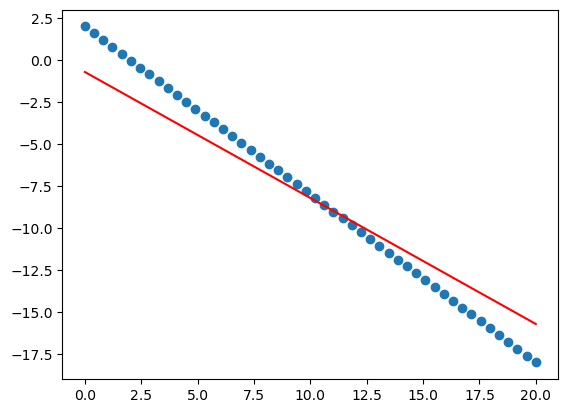

this is the last iteration  1584  with the theta_0 :  [-0.66725908]  and theta_1 :  [-0.79180985]

The R-square value :  0.9467806664066584




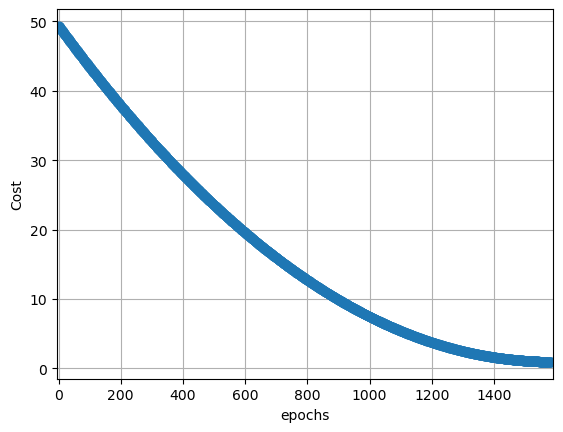

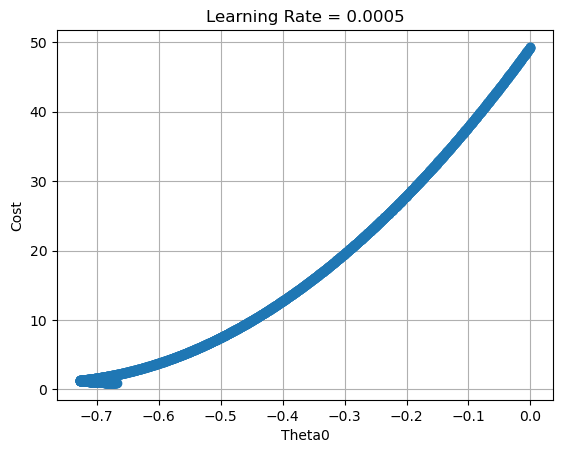

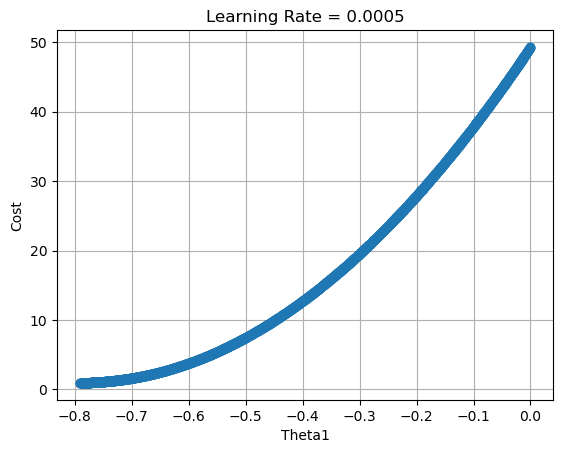

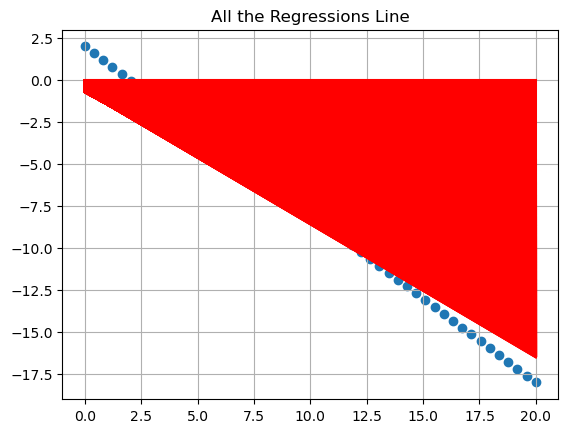

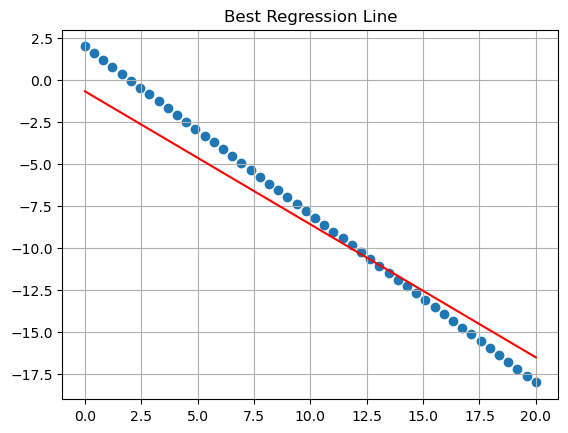

In [82]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearRegAdam(X,y,learning_rate=0.0005,max_itration=5000,verbose=500,beta_1=0.8,beta_2=0.8)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))
print('\n')

plot(learning_rate=0.0005)

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.001 -0.001]


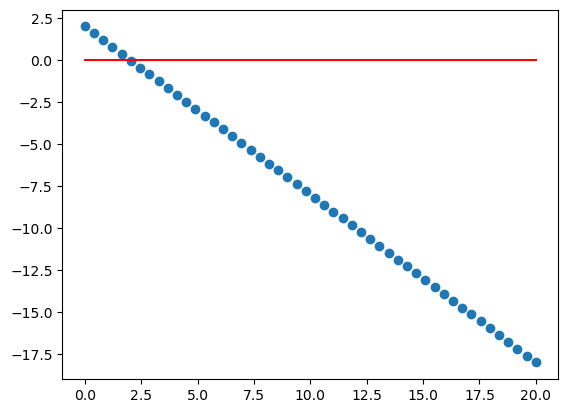


************************** itration  500 *************************

h(x)
 [-0.44354518 -0.62744935 -0.81135353 -0.9952577  -1.17916188 -1.36306605
 -1.54697023 -1.73087441 -1.91477858 -2.09868276 -2.28258693 -2.46649111
 -2.65039529 -2.83429946 -3.01820364 -3.20210781 -3.38601199 -3.56991616
 -3.75382034 -3.93772452 -4.12162869 -4.30553287 -4.48943704 -4.67334122
 -4.85724539 -5.04114957 -5.22505375 -5.40895792 -5.5928621  -5.77676627
 -5.96067045 -6.14457463 -6.3284788  -6.51238298 -6.69628715 -6.88019133
 -7.0640955  -7.24799968 -7.43190386 -7.61580803 -7.79971221 -7.98361638
 -8.16752056 -8.35142473 -8.53532891 -8.71923309 -8.90313726 -9.08704144
 -9.27094561 -9.45484979]
Error Vec:
 [-2.44354518 -2.21928609 -1.995027   -1.77076791 -1.54650882 -1.32224973
 -1.09799064 -0.87373155 -0.64947246 -0.42521337 -0.20095428  0.02330481
  0.2475639   0.47182299  0.69608208  0.92034117  1.14460026  1.36885935
  1.59311844  1.81737753  2.04163661  2.2658957   2.49015479  2.71441388
  2.9386729

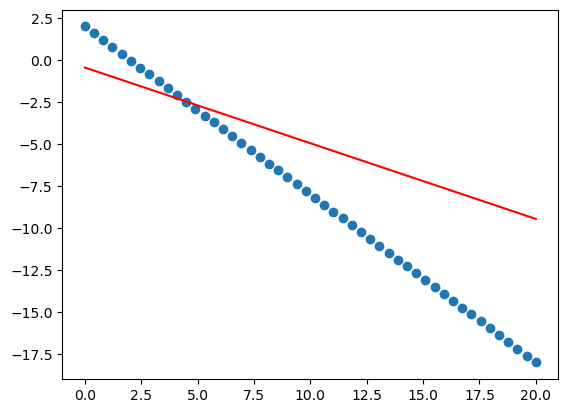


************************** itration  1000 *************************

h(x)
 [ -0.64835528  -0.9631622   -1.27796911  -1.59277603  -1.90758295
  -2.22238986  -2.53719678  -2.8520037   -3.16681062  -3.48161753
  -3.79642445  -4.11123137  -4.42603828  -4.7408452   -5.05565212
  -5.37045903  -5.68526595  -6.00007287  -6.31487978  -6.6296867
  -6.94449362  -7.25930054  -7.57410745  -7.88891437  -8.20372129
  -8.5185282   -8.83333512  -9.14814204  -9.46294895  -9.77775587
 -10.09256279 -10.4073697  -10.72217662 -11.03698354 -11.35179045
 -11.66659737 -11.98140429 -12.29621121 -12.61101812 -12.92582504
 -13.24063196 -13.55543887 -13.87024579 -14.18505271 -14.49985962
 -14.81466654 -15.12947346 -15.44428037 -15.75908729 -16.07389421]
Error Vec:
 [-2.64835528 -2.55499893 -2.46164258 -2.36828624 -2.27492989 -2.18157354
 -2.08821719 -1.99486084 -1.90150449 -1.80814814 -1.7147918  -1.62143545
 -1.5280791  -1.43472275 -1.3413664  -1.24801005 -1.15465371 -1.06129736
 -0.96794101 -0.87458466 -0.78122

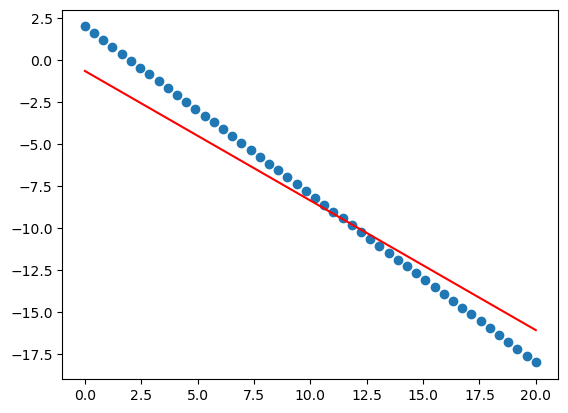

this is the last iteration  1063  with the theta_0 :  [-0.60388413]  and theta_1 :  [-0.78988499]

The R-square value :  0.9485667803280174




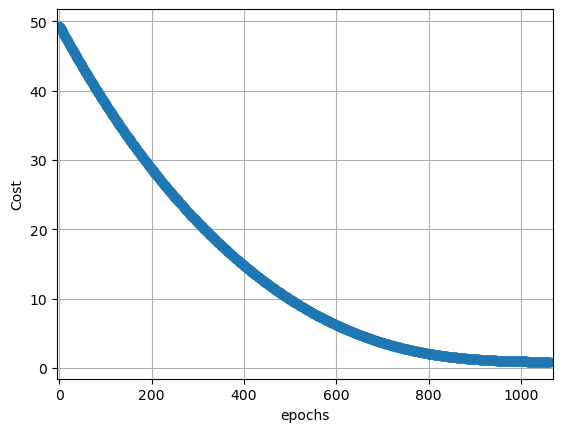

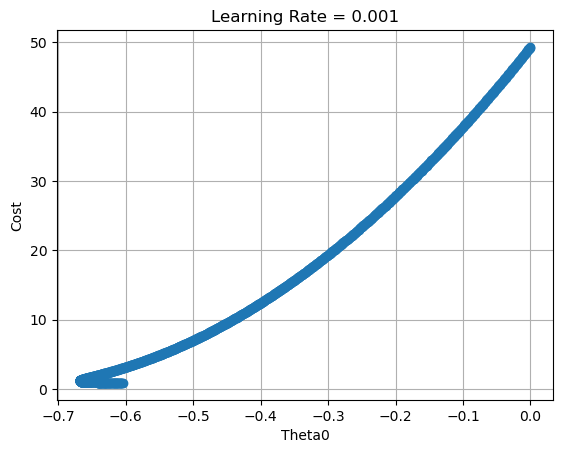

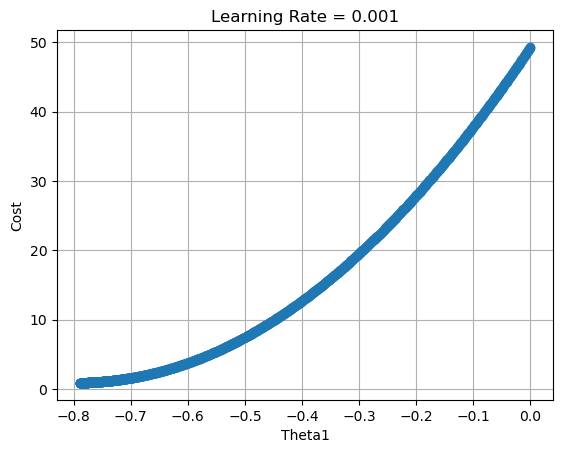

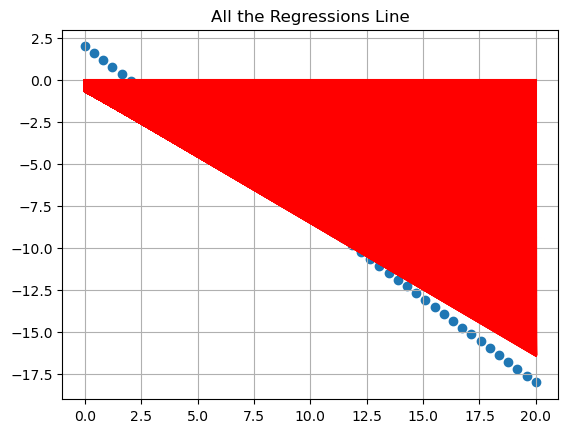

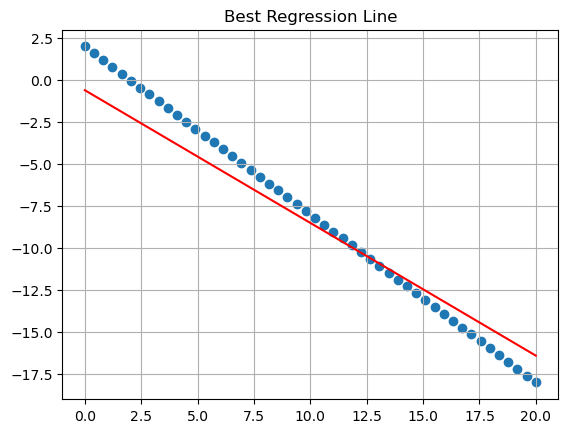

In [83]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearRegAdam(X,y,learning_rate=0.001,max_itration=5000,verbose=500,beta_1=0.9,beta_2=0.99)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))
print('\n')

plot(learning_rate=0.001)

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.001 -0.001]


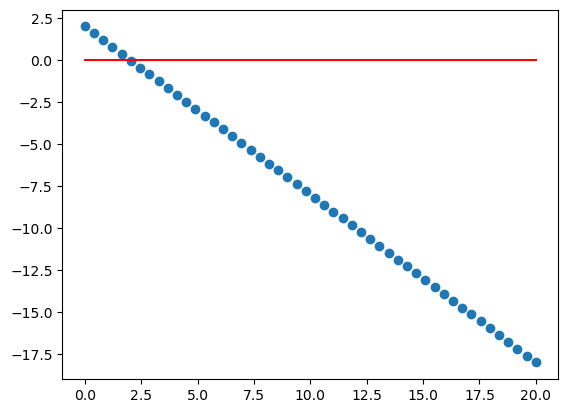


************************** itration  500 *************************

h(x)
 [ -0.50935044  -0.71668897  -0.92402749  -1.13136601  -1.33870453
  -1.54604306  -1.75338158  -1.9607201   -2.16805862  -2.37539715
  -2.58273567  -2.79007419  -2.99741271  -3.20475123  -3.41208976
  -3.61942828  -3.8267668   -4.03410532  -4.24144385  -4.44878237
  -4.65612089  -4.86345941  -5.07079794  -5.27813646  -5.48547498
  -5.6928135   -5.90015203  -6.10749055  -6.31482907  -6.52216759
  -6.72950611  -6.93684464  -7.14418316  -7.35152168  -7.5588602
  -7.76619873  -7.97353725  -8.18087577  -8.38821429  -8.59555282
  -8.80289134  -9.01022986  -9.21756838  -9.42490691  -9.63224543
  -9.83958395 -10.04692247 -10.25426099 -10.46159952 -10.66893804]
Error Vec:
 [-2.50935044 -2.3085257  -2.10770096 -1.90687622 -1.70605147 -1.50522673
 -1.30440199 -1.10357724 -0.9027525  -0.70192776 -0.50110301 -0.30027827
 -0.09945353  0.10137121  0.30219596  0.5030207   0.70384544  0.90467019
  1.10549493  1.30631967  1.507144

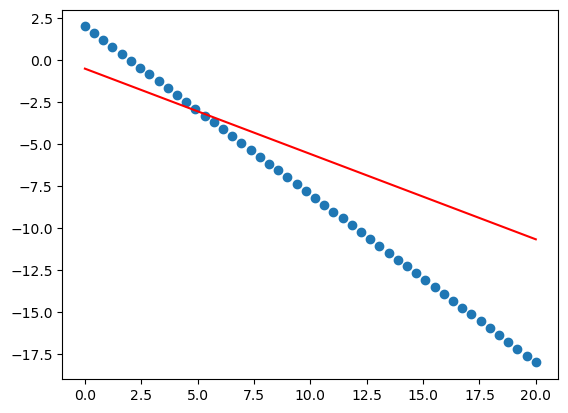

this is the last iteration  759  with the theta_0 :  [-0.73891269]  and theta_1 :  [-0.80059121]

The R-square value :  0.944245878919177




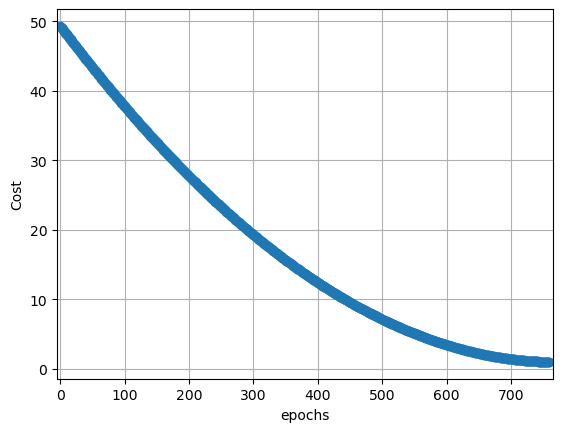

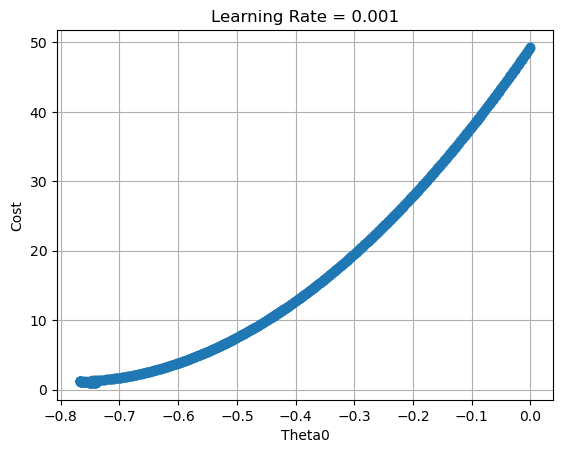

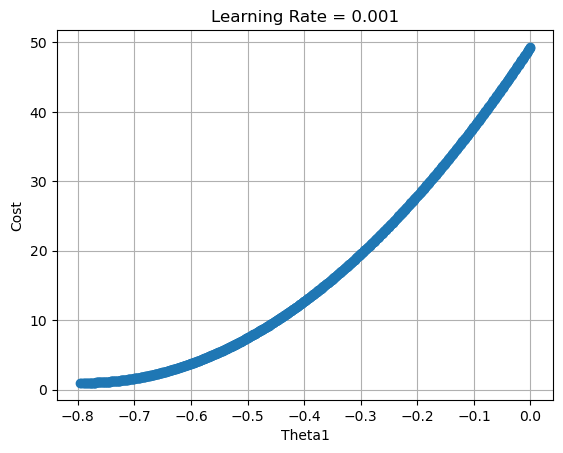

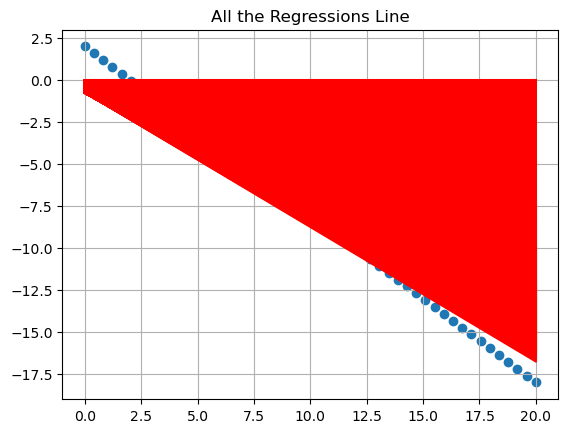

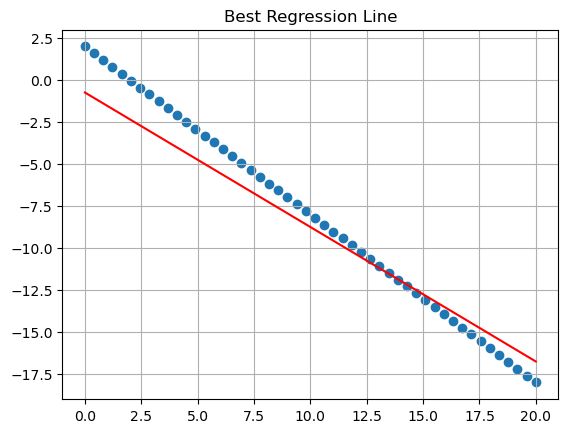

In [84]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearRegAdam(X,y,learning_rate=0.001,max_itration=5000,verbose=500,beta_1=0.9,beta_2=0.5)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))
print('\n')

plot(learning_rate=0.001)

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.001 -0.001]


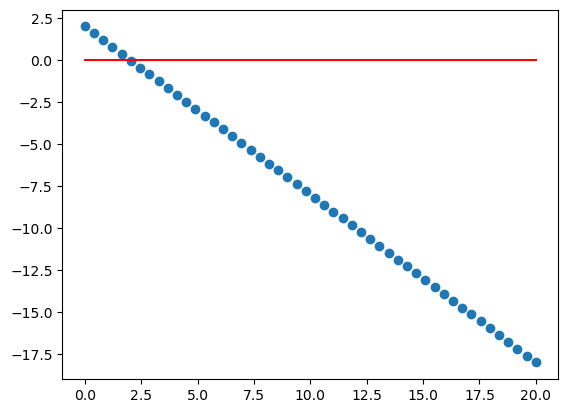


************************** itration  500 *************************

h(x)
 [-0.4381535  -0.62007591 -0.80199831 -0.98392072 -1.16584313 -1.34776553
 -1.52968794 -1.71161035 -1.89353275 -2.07545516 -2.25737757 -2.43929998
 -2.62122238 -2.80314479 -2.9850672  -3.1669896  -3.34891201 -3.53083442
 -3.71275682 -3.89467923 -4.07660164 -4.25852404 -4.44044645 -4.62236886
 -4.80429126 -4.98621367 -5.16813608 -5.35005848 -5.53198089 -5.7139033
 -5.89582571 -6.07774811 -6.25967052 -6.44159293 -6.62351533 -6.80543774
 -6.98736015 -7.16928255 -7.35120496 -7.53312737 -7.71504977 -7.89697218
 -8.07889459 -8.26081699 -8.4427394  -8.62466181 -8.80658421 -8.98850662
 -9.17042903 -9.35235143]
Error Vec:
 [-2.4381535  -2.21191264 -1.98567178 -1.75943092 -1.53319007 -1.30694921
 -1.08070835 -0.85446749 -0.62822663 -0.40198577 -0.17574492  0.05049594
  0.2767368   0.50297766  0.72921852  0.95545938  1.18170024  1.40794109
  1.63418195  1.86042281  2.08666367  2.31290453  2.53914539  2.76538624
  2.9916271 

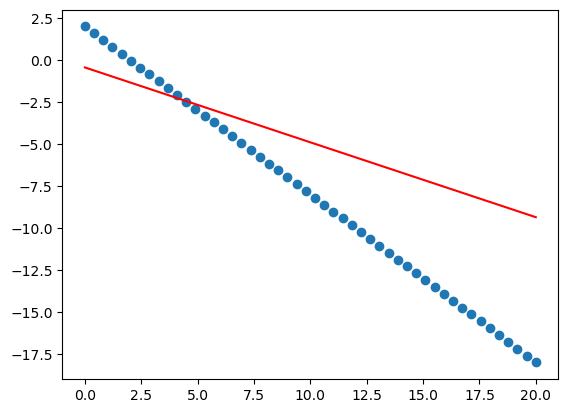


************************** itration  1000 *************************

h(x)
 [ -0.64785128  -0.95991204  -1.27197279  -1.58403355  -1.89609431
  -2.20815507  -2.52021583  -2.83227658  -3.14433734  -3.4563981
  -3.76845886  -4.08051962  -4.39258037  -4.70464113  -5.01670189
  -5.32876265  -5.64082341  -5.95288416  -6.26494492  -6.57700568
  -6.88906644  -7.2011272   -7.51318795  -7.82524871  -8.13730947
  -8.44937023  -8.76143099  -9.07349174  -9.3855525   -9.69761326
 -10.00967402 -10.32173478 -10.63379553 -10.94585629 -11.25791705
 -11.56997781 -11.88203857 -12.19409932 -12.50616008 -12.81822084
 -13.1302816  -13.44234236 -13.75440311 -14.06646387 -14.37852463
 -14.69058539 -15.00264615 -15.31470691 -15.62676766 -15.93882842]
Error Vec:
 [-2.64785128 -2.55174877 -2.45564626 -2.35954376 -2.26344125 -2.16733874
 -2.07123623 -1.97513373 -1.87903122 -1.78292871 -1.6868262  -1.5907237
 -1.49462119 -1.39851868 -1.30241618 -1.20631367 -1.11021116 -1.01410865
 -0.91800615 -0.82190364 -0.725801

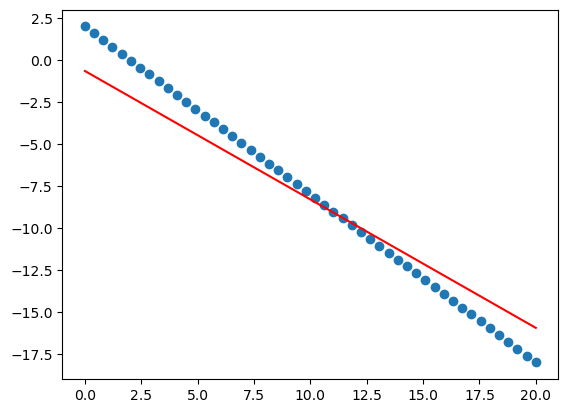

this is the last iteration  1090  with the theta_0 :  [-0.58407815]  and theta_1 :  [-0.79147156]

The R-square value :  0.949344733641701




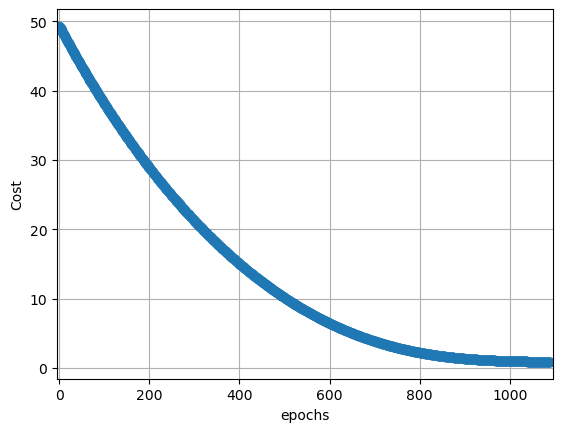

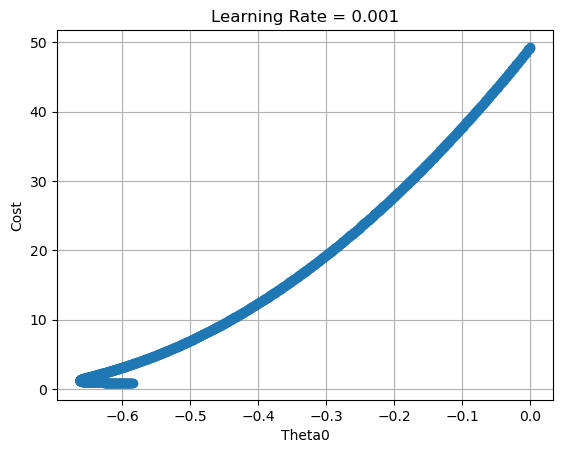

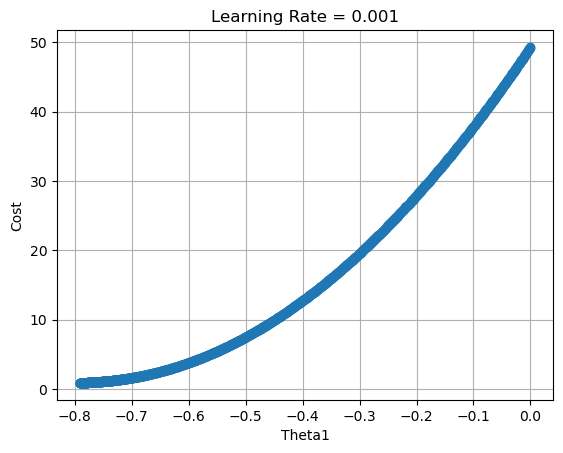

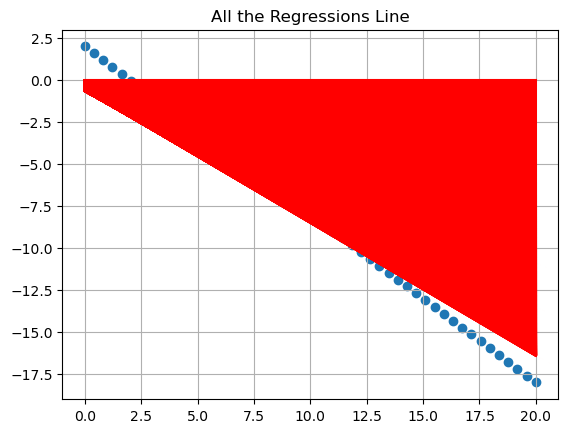

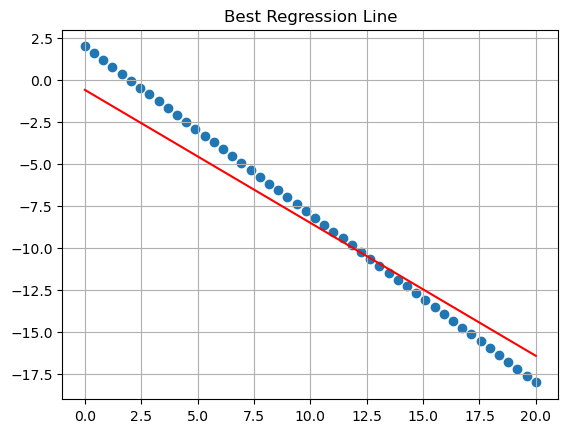

In [85]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearRegAdam(X,y,learning_rate=0.001,max_itration=5000,verbose=500,beta_1=0.5,beta_2=0.99)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))
print('\n')

plot(learning_rate=0.001)

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.001 -0.001]


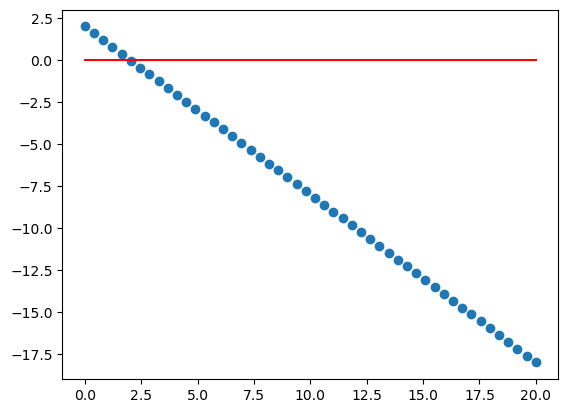


************************** itration  500 *************************

h(x)
 [ -0.49999701  -0.70407777  -0.90815853  -1.11223929  -1.31632006
  -1.52040082  -1.72448158  -1.92856234  -2.1326431   -2.33672387
  -2.54080463  -2.74488539  -2.94896615  -3.15304691  -3.35712768
  -3.56120844  -3.7652892   -3.96936996  -4.17345072  -4.37753149
  -4.58161225  -4.78569301  -4.98977377  -5.19385453  -5.3979353
  -5.60201606  -5.80609682  -6.01017758  -6.21425834  -6.41833911
  -6.62241987  -6.82650063  -7.03058139  -7.23466215  -7.43874291
  -7.64282368  -7.84690444  -8.0509852   -8.25506596  -8.45914672
  -8.66322749  -8.86730825  -9.07138901  -9.27546977  -9.47955053
  -9.6836313   -9.88771206 -10.09179282 -10.29587358 -10.49995434]
Error Vec:
 [-2.49999701 -2.29591451 -2.091832   -1.8877495  -1.683667   -1.47958449
 -1.27550199 -1.07141948 -0.86733698 -0.66325448 -0.45917197 -0.25508947
 -0.05100697  0.15307554  0.35715804  0.56124054  0.76532305  0.96940555
  1.17348805  1.37757056  1.581653

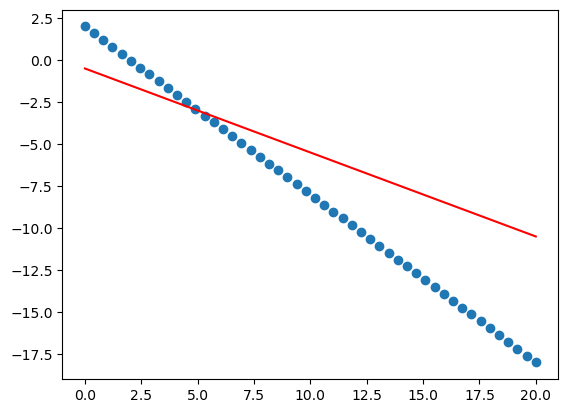

this is the last iteration  801  with the theta_0 :  [-0.65667033]  and theta_1 :  [-0.80073547]

The R-square value :  0.9475845101116701




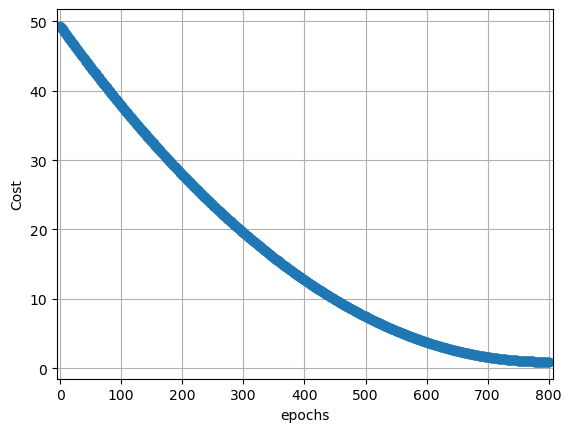

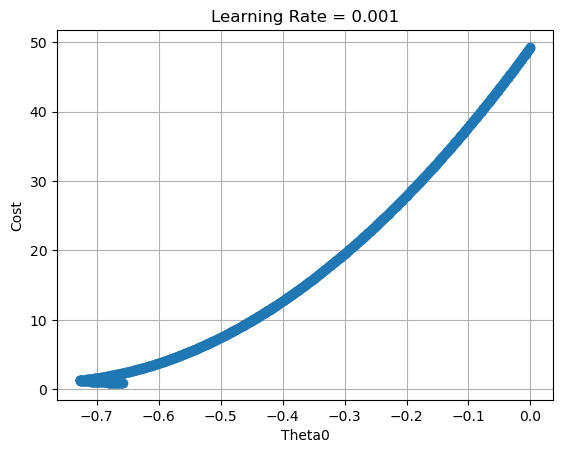

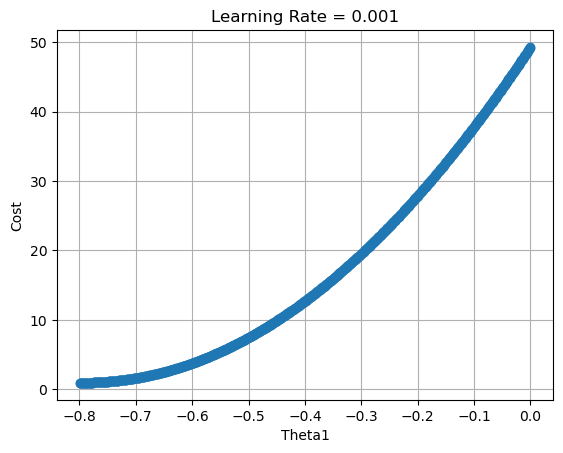

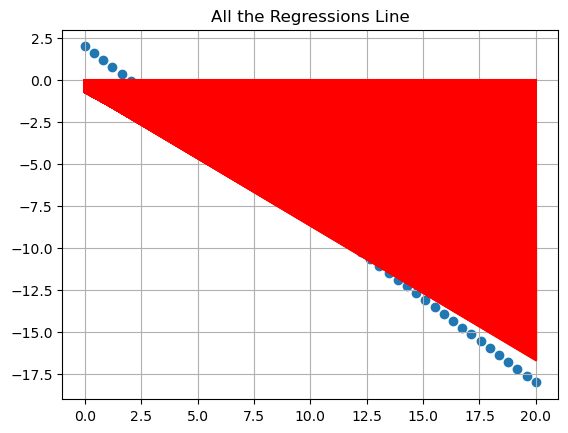

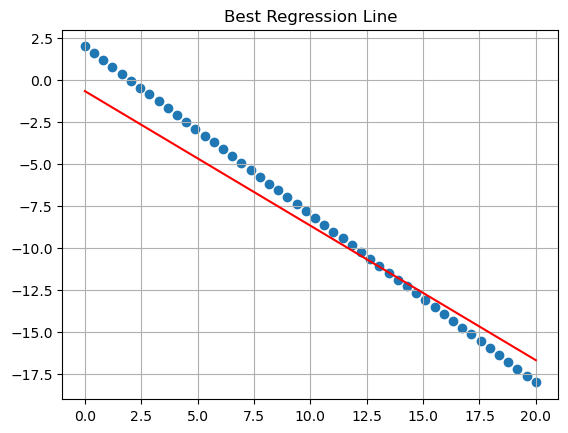

In [86]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearRegAdam(X,y,learning_rate=0.001,max_itration=5000,verbose=500,beta_1=0.5,beta_2=0.5)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))
print('\n')

plot(learning_rate=0.001)

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost =  [49.34693878]
Norm Gradient 114.97254258164628
thetas :  [-0.01 -0.01]


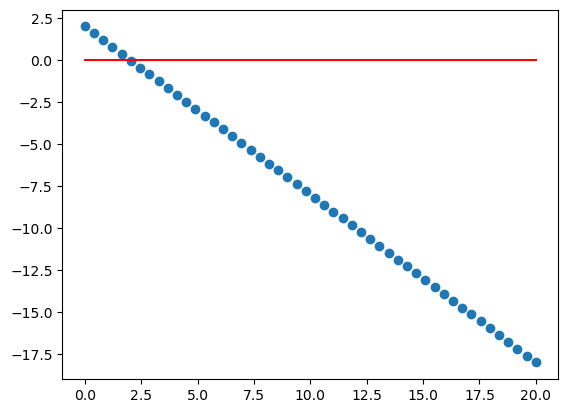


************************** itration  500 *************************

h(x)
 [  0.88976474   0.51590869   0.14205265  -0.2318034   -0.60565944
  -0.97951549  -1.35337153  -1.72722758  -2.10108362  -2.47493967
  -2.84879571  -3.22265176  -3.5965078   -3.97036385  -4.34421989
  -4.71807594  -5.09193198  -5.46578803  -5.83964407  -6.21350012
  -6.58735616  -6.96121221  -7.33506825  -7.7089243   -8.08278034
  -8.45663639  -8.83049243  -9.20434848  -9.57820452  -9.95206057
 -10.32591661 -10.69977266 -11.0736287  -11.44748475 -11.82134079
 -12.19519684 -12.56905288 -12.94290893 -13.31676497 -13.69062102
 -14.06447706 -14.43833311 -14.81218915 -15.1860452  -15.55990124
 -15.93375729 -16.30761333 -16.68146937 -17.05532542 -17.42918146]
Error Vec:
 [-1.11023526 -1.07592804 -1.04162082 -1.0073136  -0.97300638 -0.93869916
 -0.90439194 -0.87008472 -0.8357775  -0.80147028 -0.76716306 -0.73285584
 -0.69854862 -0.6642414  -0.62993418 -0.59562696 -0.56131974 -0.52701252
 -0.4927053  -0.45839808 -0.42409

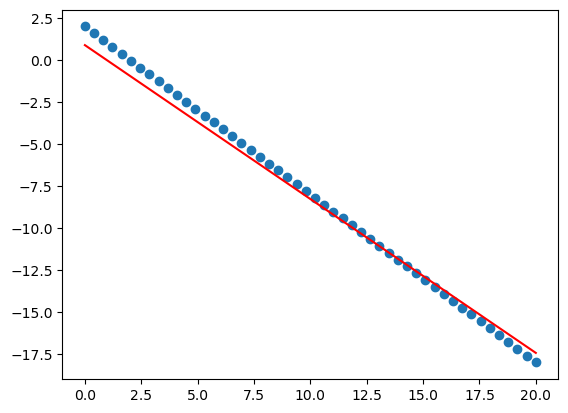

this is the last iteration  562  with the theta_0 :  [1.20382709]  and theta_1 :  [-0.93980254]

The R-square value :  0.9952892444628807




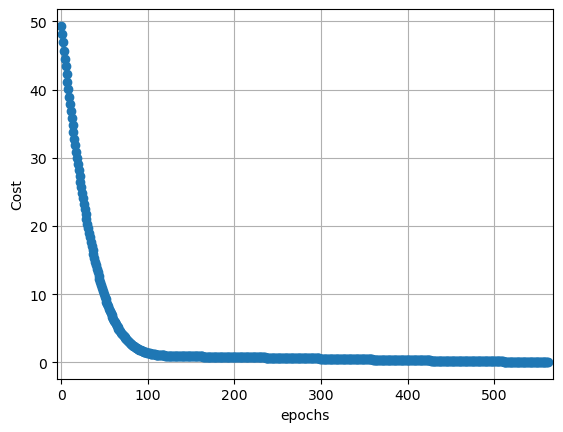

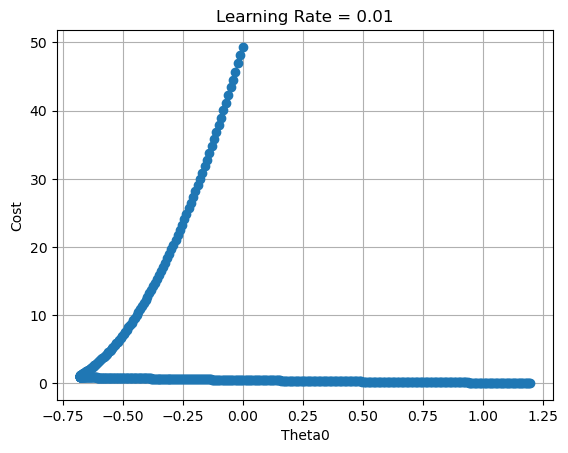

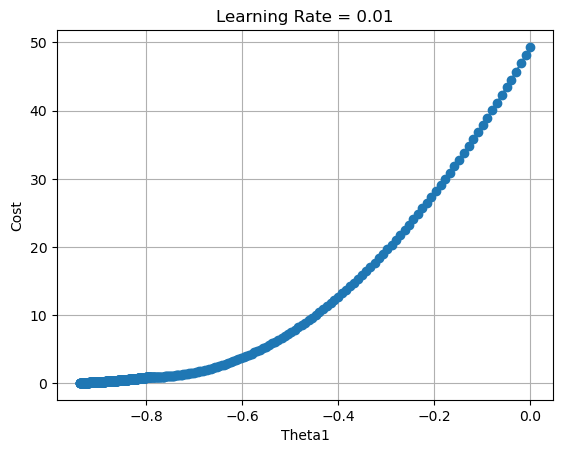

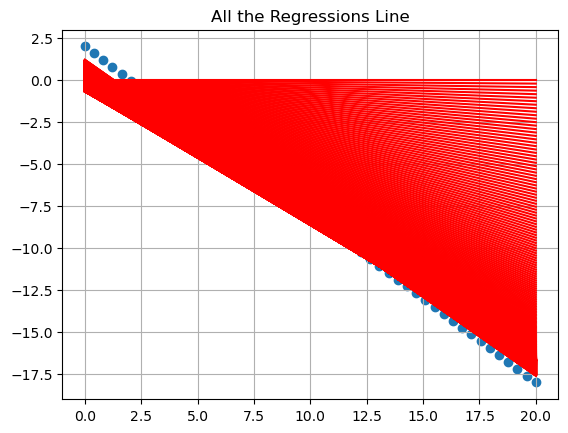

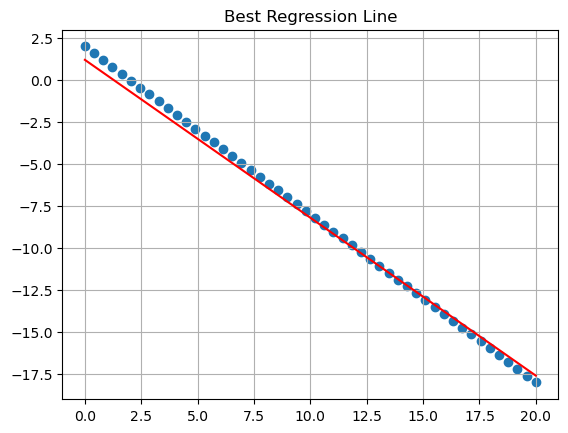

In [87]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearRegAdam(X,y,learning_rate=0.01,max_itration=5000,verbose=500,beta_1=0.9,beta_2=0.99)

y_predict = predict(X,th)
print('\nThe R-square value : ',r2_score(y,y_predict))
print('\n')

plot(learning_rate=0.01)

## Congratulations 
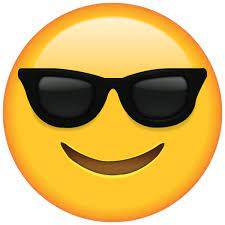